In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install dmba

In [ ]:
pip install pykan

In [ ]:
## Importing Required Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plotly Graphing Libraries
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
import plotly.express as px

## Machine Learning Libaries
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from keras import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import CSVLogger
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/Projects /KAN/DataCoSupplyChainDataset.csv',header= 0,encoding= 'unicode_escape')

In [ ]:
df

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0.0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45616,PAYMENT,5,4,-78.059998,327.980011,Late delivery,1,45,Fishing,Washington,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0.0,5/29/2015 12:56,Standard Class
45617,PAYMENT,2,4,27.120001,239.979996,Advance shipping,0,43,Camping & Hiking,Norcross,...,NaN,957,43,NaN,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0.0,4/18/2015 11:14,Standard Class
45618,PAYMENT,2,4,74.400002,239.979996,Advance shipping,0,43,Camping & Hiking,Tustin,...,NaN,957,43,NaN,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0.0,4/19/2017 14:46,Standard Class
45619,PAYMENT,5,4,-559.969971,319.980011,Late delivery,1,45,Fishing,Washington,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0.0,5/29/2015 12:56,Standard Class


## Data Description

In [ ]:
df.shape

(45621, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45621 entries, 0 to 45620
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           45621 non-null  object 
 1   Days for shipping (real)       45621 non-null  int64  
 2   Days for shipment (scheduled)  45621 non-null  int64  
 3   Benefit per order              45621 non-null  float64
 4   Sales per customer             45621 non-null  float64
 5   Delivery Status                45621 non-null  object 
 6   Late_delivery_risk             45621 non-null  int64  
 7   Category Id                    45621 non-null  int64  
 8   Category Name                  45621 non-null  object 
 9   Customer City                  45621 non-null  object 
 10  Customer Country               45621 non-null  object 
 11  Customer Email                 45621 non-null  object 
 12  Customer Fname                 45621 non-null 

In [ ]:
df.isnull().sum()

Type                                 0
Days for shipping (real)             0
Days for shipment (scheduled)        0
Benefit per order                    0
Sales per customer                   0
Delivery Status                      0
Late_delivery_risk                   0
Category Id                          0
Category Name                        0
Customer City                        0
Customer Country                     0
Customer Email                       0
Customer Fname                       0
Customer Id                          0
Customer Lname                       1
Customer Password                    0
Customer Segment                     0
Customer State                       0
Customer Street                      0
Customer Zipcode                     1
Department Id                        0
Department Name                      0
Latitude                             0
Longitude                            0
Market                               0
Order City               

###### Combining the Last Name and First names to identify unique customers

In [ ]:
df['Cust_Full_Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

## Data Cleaning

Dropping unimporant columns

In [ ]:
df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname',
         'Customer Lname','Latitude','Longitude','Product Description','Product Image','Order Zipcode',
         'shipping date (DateOrders)'],axis=1, inplace = True)

In [ ]:
df.shape

(45621, 42)

In [ ]:
df.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 1
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ra

since we just have a couple of missing values lets drop them all (Rows)

In [ ]:
df= df.dropna()

Creating new column using the Order Date Column

In [ ]:
df['order date (DateOrders)'].head()

0    1/31/2018 22:56
1    1/13/2018 12:27
2    1/13/2018 12:06
3    1/13/2018 11:45
4    1/13/2018 11:24
Name: order date (DateOrders), dtype: object

In [ ]:
## Splitting Order dates and creating new columns
df['order_yr']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Dropping columns that are less relevant for correlation analysis
columns_to_drop = ['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password',
                   'Customer Street', 'Customer Zipcode', 'Product Description', 'Product Image',
                   'shipping date (DateOrders)', 'order date (DateOrders)', 'Order Zipcode']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Converting object type columns to categorical if they are not dates
for col in df_cleaned.select_dtypes(include=['object']).columns:
    if col not in ['shipping date (DateOrders)', 'order date (DateOrders)']:
        df_cleaned[col] = df_cleaned[col].astype('category')

# Applying label encoding to categorical columns
label_encoder = LabelEncoder()
for col in df_cleaned.select_dtypes(include=['category']).columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Checking the cleaned data types
df_cleaned.dtypes

Type                               int64
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                    int64
Late_delivery_risk                 int64
Category Id                        int64
Category Name                      int64
Customer City                      int64
Customer Country                   int64
Customer Id                        int64
Customer Segment                   int64
Customer State                     int64
Department Id                      int64
Department Name                    int64
Market                             int64
Order City                         int64
Order Country                      int64
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id   

## Data Visuzalization

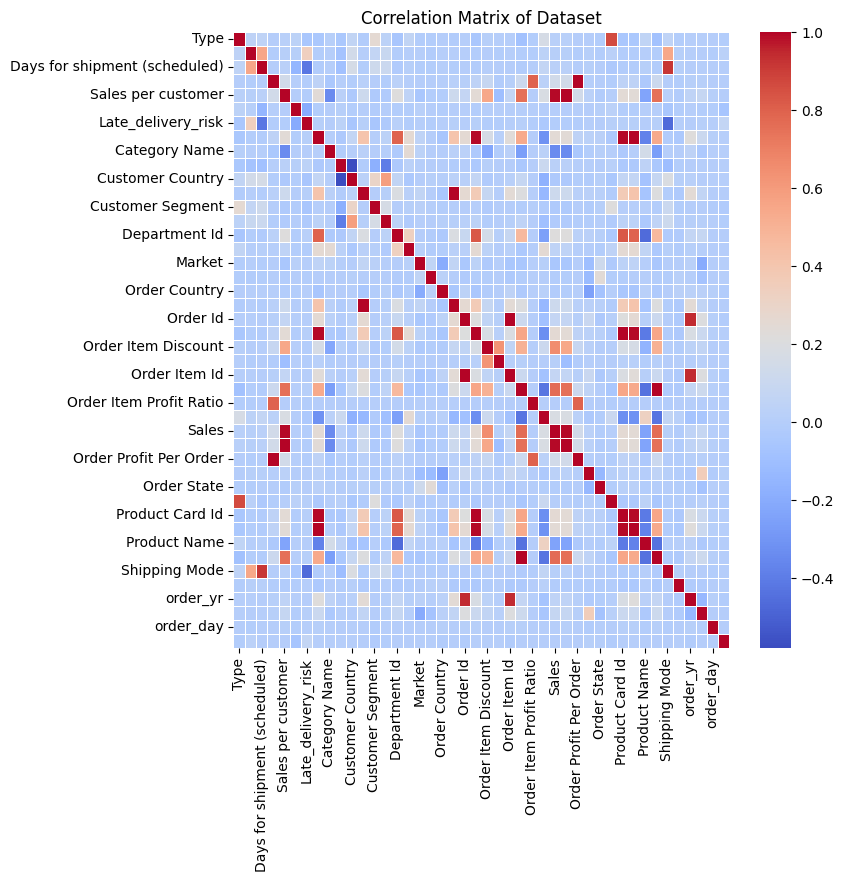

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df_cleaned.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Dataset')
plt.show()

Some products have a negative benefit per order, indicating that the orders are costing the company money.

In [ ]:
loss = df[(df['Benefit per order']<0)]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Europe'),
  Text(1, 0, 'LATAM'),
  Text(2, 0, 'Pacific Asia'),
  Text(3, 0, 'USCA'),
  Text(4, 0, 'Africa')])

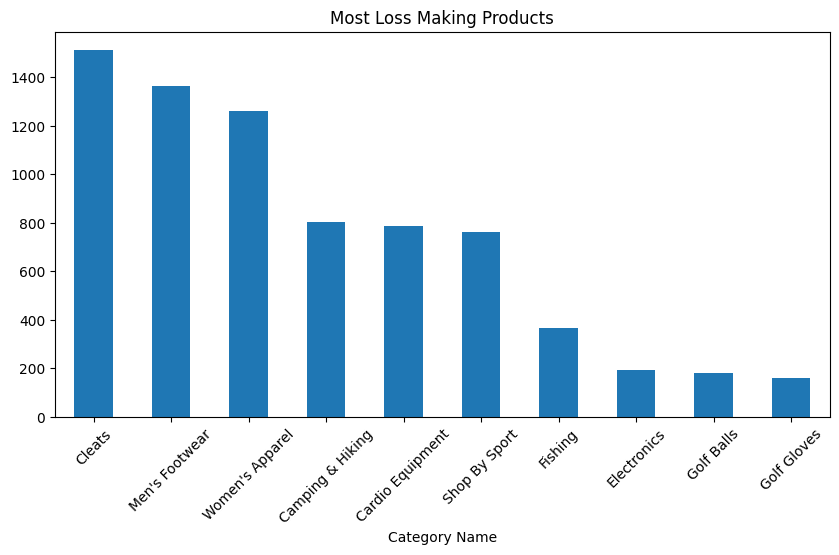

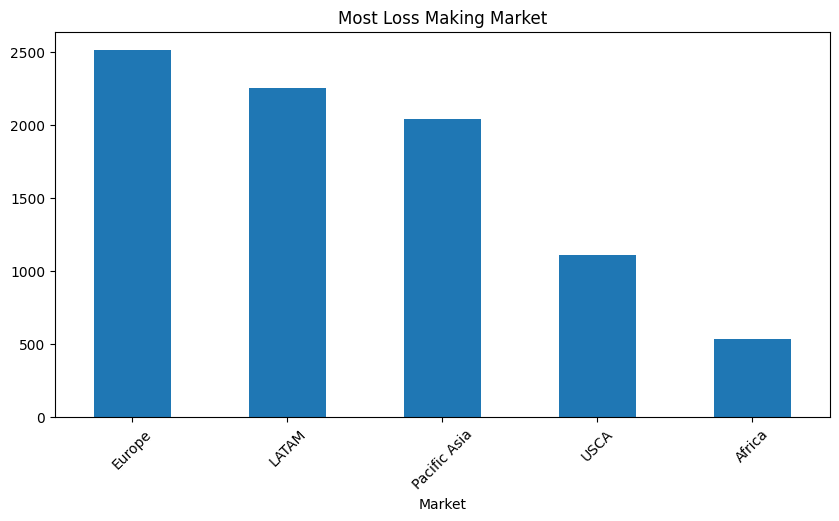

In [ ]:
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(10,5), title="Most Loss Making Products")
plt.xticks(rotation = 45)
plt.figure(2)
loss['Market'].value_counts().nlargest(10).plot.bar(figsize=(10,5), title="Most Loss Making Market")
plt.xticks(rotation = 45)

Order Status as per the payment types

In [ ]:
status = df.groupby('Type')['Order Status'].value_counts()
status_df = status.to_frame()

In [ ]:
status_df

count
Type     Order Status          
CASH     CLOSED            9138
DEBIT    COMPLETE         17347
         ON_HOLD           2743
PAYMENT  PENDING_PAYMENT   9247
         PAYMENT_REVIEW     470
TRANSFER PROCESSING        3041
         PENDING           2592
         SUSPECTED_FRAUD    550
         CANCELED           491

As we can see that only Transfer payments have a possible suspected fraud situation, what products have the most fraud?

In [ ]:
fraud_region = df[(df['Order Status'] == 'SUSPECTED_FRAUD')]

In [ ]:

plt.style.use("default")
temp = fraud_region['Category Name'].value_counts().nlargest(10)
temp.iplot(kind='bar', xTitle = 'Category', yTitle = "Count", title = 'Count of Products with suspected fraud', color = '#FF0000')

NameError: name 'plt' is not defined

In [ ]:
import plotly.express as px

# Convert the Series to a DataFrame
temp_df = temp.reset_index()
temp_df.columns = ['Category', 'Count']

# Plot using Plotly Express
fig = px.bar(temp_df, x='Category', y='Count', color='Count',
             title='Count of Products with suspected fraud',
             labels={'Category': 'Category', 'Count': 'Count'})
fig.update_traces(marker_color='#FF0000')
fig.show()

NameError: name 'temp' is not defined

## Data Modelling and Neural Networks to predict possible fraud

In [ ]:
# Creating a copy of the datafram
train_df = df.copy()

In [ ]:
# Creating Binary enocode for Suspected Fraud and Late delivery

train_df['fraud'] = np.where(train_df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
train_df['late_delivery']=np.where(train_df['Delivery Status'] == 'Late delivery', 1, 0)

In [ ]:
train_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'Shipping Mode', 'Cust_Full_Name', 'order_yr',
       'order_month', 'order_day', 'order_hour', 'fraud', 'late_delivery'],
     

In [ ]:
train_df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.75,Standard Class,CallyHolloway,2018,1,2,22,0,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Smart watch,327.75,Standard Class,IreneLuna,2018,1,5,12,0,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Smart watch,327.75,Standard Class,GillianMaldonado,2018,1,5,12,0,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Smart watch,327.75,Standard Class,TanaTate,2018,1,5,11,0,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Smart watch,327.75,Standard Class,OrliHendricks,2018,1,5,11,0,0


In [ ]:
## Removing Identical columns after creating new columns
train_df.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)

In [ ]:
#Creating a copy for modeling KAN
df_cleaned=train_df.copy()

In [ ]:
## Final dimensions of the dataset after wrangling and cleaning

train_df.shape

(45619, 44)

In [ ]:
train_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Id                        int64
Customer Segment                  object
Customer State                    object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Market                            object
Order City                        object
Order Country                     object
Order Customer Id                  int64
Order Id                           int64
Order Item Cardprod Id             int64
Order Item Discount              float64
Order Item Discount Rate         float64
Order Item Id                      int64
Order Item Produ

### Encoding all Object type variables

In [ ]:
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
train_df['Customer Country']  = le.fit_transform(train_df['Customer Country'])
train_df['Market']            = le.fit_transform(train_df['Market'])
train_df['Type']              = le.fit_transform(train_df['Type'])
train_df['Product Name']      = le.fit_transform(train_df['Product Name'])
train_df['Customer Segment']  = le.fit_transform(train_df['Customer Segment'])
train_df['Customer State']    = le.fit_transform(train_df['Customer State'])
train_df['Order Region']      = le.fit_transform(train_df['Order Region'])
train_df['Order City']        = le.fit_transform(train_df['Order City'])
train_df['Category Name']     = le.fit_transform(train_df['Category Name'])
train_df['Customer City']     = le.fit_transform(train_df['Customer City'])
train_df['Department Name']   = le.fit_transform(train_df['Department Name'])
train_df['Order State']       = le.fit_transform(train_df['Order State'])
train_df['Shipping Mode']     = le.fit_transform(train_df['Shipping Mode'])
train_df['Order Country']     = le.fit_transform(train_df['Order Country'])
train_df['Cust_Full_Name']    = le.fit_transform(train_df['Cust_Full_Name'])

In [ ]:
train_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,35,65,1,20755,...,63,327.75,3,943,2018,1,2,22,0,0
1,3,5,4,-249.089996,311.359985,73,35,65,1,19492,...,63,327.75,3,2697,2018,1,5,12,0,1
2,0,4,4,-247.779999,309.720001,73,35,451,0,19491,...,63,327.75,3,2290,2018,1,5,12,0,0
3,1,3,4,22.860001,304.809998,73,35,284,0,19490,...,63,327.75,3,6911,2018,1,5,11,0,0
4,2,2,4,134.210007,298.250000,73,35,65,1,19489,...,63,327.75,3,5768,2018,1,5,11,0,0


## Preparing Data for Neural Networks

Creating a Validation Set from the orignal data

In [ ]:
## Selecting 10% of the dataset for validation

fraction_of_rows = train_df.sample(frac=0.1, random_state = 1)
fraction_of_rows

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,Cust_Full_Name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
41805,1,3,4,20.129999,123.489998,18,30,65,1,6446,...,45,129.990005,3,5111,2016,8,6,21,0,0
10655,2,6,4,-371.940002,239.960007,17,12,65,1,174,...,56,59.990002,3,4994,2016,1,5,15,0,1
32042,1,6,4,1.410000,11.240000,36,22,483,0,11727,...,36,14.990000,3,4574,2015,11,2,13,0,1
14779,1,5,4,-158.729996,226.759995,17,12,106,0,7999,...,56,59.990002,3,5413,2015,4,5,10,0,1
37414,2,6,2,26.379999,77.580002,29,33,59,0,2956,...,82,39.990002,2,7252,2017,1,5,16,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35960,1,2,1,104.150002,371.980011,45,18,545,0,3947,...,22,399.980011,0,4475,2015,9,2,13,0,1
35410,0,5,4,143.539993,494.950012,9,10,446,0,7234,...,50,99.989998,3,4482,2015,5,6,19,0,1
11179,3,0,0,8.630000,103.989998,18,30,65,1,4031,...,45,129.990005,1,5172,2017,3,0,3,0,0
44585,1,0,0,37.240002,116.370003,29,33,58,0,2382,...,82,39.990002,1,4761,2015,3,2,6,0,0


In [ ]:
## Creating a list of index of the samples to be dropped from the main dataset

index = fraction_of_rows.index.values.tolist()
index

[41805,
 10655,
 32042,
 14779,
 37414,
 17652,
 27928,
 38270,
 32256,
 24567,
 22573,
 37263,
 4487,
 44819,
 18831,
 7322,
 44454,
 3997,
 29498,
 9848,
 4528,
 41554,
 665,
 43162,
 26144,
 21784,
 7712,
 33056,
 37470,
 7443,
 28653,
 43535,
 27545,
 11742,
 20284,
 20782,
 34610,
 43881,
 15911,
 23671,
 753,
 21914,
 35745,
 5490,
 20969,
 38823,
 43025,
 15912,
 11849,
 655,
 42254,
 11912,
 24874,
 24526,
 33590,
 8930,
 36386,
 32776,
 9560,
 34296,
 6121,
 3119,
 6366,
 7526,
 42188,
 32751,
 41313,
 12829,
 6195,
 10266,
 13616,
 7465,
 30030,
 14075,
 41646,
 20630,
 13146,
 44320,
 29607,
 9607,
 4496,
 36965,
 20855,
 37277,
 11698,
 15695,
 17909,
 11959,
 10020,
 30836,
 33387,
 9359,
 40209,
 45224,
 33263,
 42401,
 22723,
 15275,
 5494,
 20568,
 10507,
 11695,
 32145,
 41742,
 27490,
 29497,
 36588,
 44021,
 10366,
 17767,
 11991,
 26683,
 12533,
 34740,
 3310,
 2523,
 23584,
 9311,
 4170,
 2863,
 33783,
 18706,
 33650,
 24615,
 2874,
 43752,
 29902,
 36421,
 8558,
 

In [ ]:
## Dropping rows with the index numbers

train_df.drop(index = index, inplace = True)

In [ ]:
train_df.shape

(41057, 44)

In [ ]:
## Resetting index for the validation dataset

fraction_of_rows.reset_index(drop = True, inplace=True)

In [ ]:
fraction_of_rows.shape

(4562, 44)

In [ ]:
## Creating X and y for dependant and independent variables

X = train_df.loc[:,train_df.columns != 'fraud']
y = train_df['fraud']

In [ ]:
## Splitting the dataset into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [ ]:
## Creating dataframe for X and y validation dataset

X_valid = fraction_of_rows.loc[:,fraction_of_rows.columns != 'fraud']
y_valid = fraction_of_rows['fraud']

In [ ]:
X_train.shape

(28739, 43)

In [ ]:
# Defining the classes
classes = sorted(y_train.unique())

### Standardizing the data

In [ ]:
## Standardizing the X dataset

ss = StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_valid=ss.transform(X_valid)

## Creating MLPClassifier Model

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(6), activation='logistic', solver='lbfgs',random_state=1)

In [ ]:
## Fitting the data using MLPClassifier

clf.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=6, random_state=1,
              solver='lbfgs')

In [ ]:
## Predicting the trained model

clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
## Creating a Classification matrix for MLPClassifier

classificationSummary(y_test, clf.predict(X_test), class_names=classes)

Confusion Matrix (Accuracy 0.9881)

       Prediction
Actual     0     1
     0 12137    40
     1   107    34


## Creating a Custom Neural Network Model

In [ ]:
train_df.shape

(41057, 44)

In [ ]:
keras.layers.BatchNormalization()
model = Sequential()
#First Hidden Layer
model.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=43)) #As we have 43 columns

#All other hidden layers in a for loop with nodes reducing in each loop
nodes = 1024
for i in range(9):
    nodes = nodes // 2
    model.add(Dense(nodes, activation='relu', kernel_initializer='random_normal'))

#Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              45056     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

As F1 score is not accessible in Keras, binary crossentropy is used to measure loss and accuracy because the output data is binary classification.

In [ ]:
## Compiling the model created

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Fitting the model using custom neural network

Intitally we'll tried with 10 epochs which had a good accuracy but the loss was high, then we increased it to 15 which reduced the loss significantly and we stopped there to avoid overfitting of the data.

In [ ]:
csvlogger = CSVLogger('training.log',separator=',',append=False)

result = model.fit(X_train, y_train, batch_size = 512, epochs = 15, callbacks=[csvlogger])

Epoch 1/15
57/57 [==============================] - 7s 82ms/step - loss: 0.5270 - accuracy: 0.9880
Epoch 2/15
57/57 [==============================] - 3s 50ms/step - loss: 0.0545 - accuracy: 0.9880
Epoch 3/15
57/57 [==============================] - 3s 49ms/step - loss: 0.0389 - accuracy: 0.9880
Epoch 4/15
57/57 [==============================] - 3s 49ms/step - loss: 0.0322 - accuracy: 0.9880
Epoch 5/15
57/57 [==============================] - 3s 60ms/step - loss: 0.0283 - accuracy: 0.9880
Epoch 6/15
57/57 [==============================] - 5s 80ms/step - loss: 0.0258 - accuracy: 0.9880
Epoch 7/15
57/57 [==============================] - 3s 48ms/step - loss: 0.0232 - accuracy: 0.9880
Epoch 8/15
57/57 [==============================] - 3s 48ms/step - loss: 0.0220 - accuracy: 0.9880
Epoch 9/15
57/57 [==============================] - 3s 49ms/step - loss: 0.0200 - accuracy: 0.9880
Epoch 10/15
57/57 [==============================] - 3s 60ms/step - loss: 0.0182 - accuracy: 0.9880
Epoch 11/

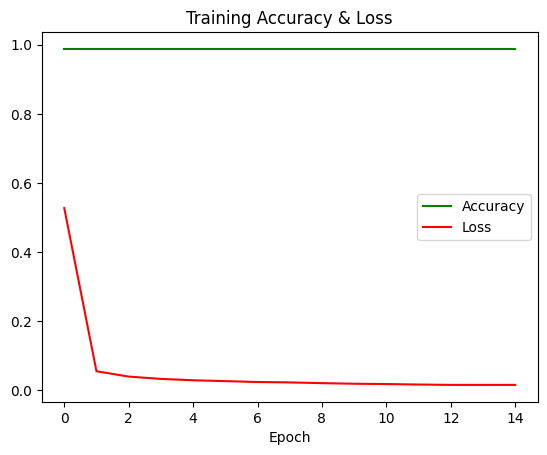

In [ ]:
plt.plot(result.history['accuracy'],'green',label='Accuracy')
plt.plot(result.history['loss'],'red',label='Loss')
plt.title('Training Accuracy & Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)

In [ ]:
# Predicting the custom model model

train_evaluate=model.evaluate(X_train, y_train)
test_evaluate=model.evaluate(X_test, y_test)
print('accuracy for Train set is',train_evaluate)
print('accuracy for Test set is',test_evaluate) # evaluation of model.
yf_pred1=model.predict(X_test,batch_size=512,verbose=1)
yf_pred=np.argmax(yf_pred1,axis=1)
print(f1_score(y_test,yf_pred,average="weighted"))

385/385 [==============================] - 2s 5ms/step - loss: 0.0715 - accuracy: 0.9886
accuracy for Train set is [0.013783943839371204, 0.9879953861236572]
accuracy for Test set is [0.07153934985399246, 0.9885533452033997]
25/25 [==============================] - 1s 25ms/step
0.9828629499524093


As we can see that the Train and test accuracy is very high at ~99% and loss is at ~8.88%.  
Along with that the F1 Score calculated is 96.58%.

## Validating the Models

### MLP Classifier

In [ ]:
## Predicting the validation dataset

clf_pred = clf.predict(X_valid)
clf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
## Classification Matrix for Validation Dataset

classificationSummary(y_valid, clf.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.9851)

       Prediction
Actual    0    1
     0 4477   21
     1   47   17


In [ ]:
accuracy_score(y_valid,clf_pred)

0.9850942569048663

### Custom NN

In [ ]:
predictions = model.predict(X_valid)

143/143 [==============================] - 1s 5ms/step


In [ ]:
predictions = (predictions > 0.5).astype(np.float32)

In [ ]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
accuracy_score(y_valid,predictions)

0.9859710653222271

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and ROC AUC for MLP Classifier
clf_probs = clf.predict_proba(X_test)
clf_probs = clf_probs[:, 1]
clf_auc = roc_auc_score(y_test, clf_probs)
clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs)

# Calculate ROC curve and ROC AUC for Custom Neural Network
nn_probs = model.predict(X_test)
nn_probs = nn_probs[:, 0]
nn_auc = roc_auc_score(y_test, nn_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)

385/385 [==============================] - 2s 5ms/step


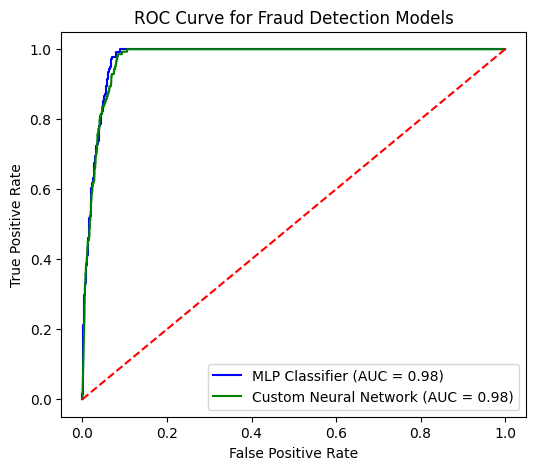

In [ ]:
# Plot ROC AUC curves
plt.figure(figsize=(6, 5))
plt.plot(clf_fpr, clf_tpr, color='blue', label=f'MLP Classifier (AUC = {clf_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, color='green', label=f'Custom Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Fraud Detection Models')
plt.legend(loc='lower right')
plt.show()

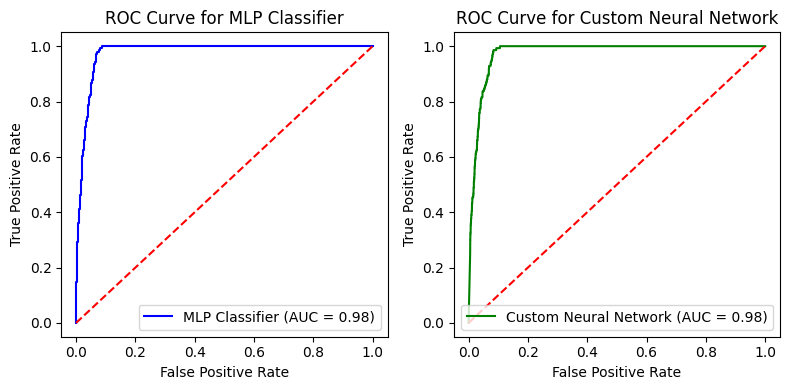

In [ ]:
# Create subplots for ROC AUC curves
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot ROC AUC curve for MLP Classifier
axs[0].plot(clf_fpr, clf_tpr, color='blue', label=f'MLP Classifier (AUC = {clf_auc:.2f})')
axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curve for MLP Classifier')
axs[0].legend(loc='lower right')

# Plot ROC AUC curve for Custom Neural Network
axs[1].plot(nn_fpr, nn_tpr, color='green', label=f'Custom Neural Network (AUC = {nn_auc:.2f})')
axs[1].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC Curve for Custom Neural Network')
axs[1].legend(loc='lower right')

plt.tight_layout()
plt.show()